In [8]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

In [9]:
ozone_csv = pd.read_csv("Monthly mean thickness Dobson units ozone column Arosa Switzerland 192.csv")
ozone_csv.rename(columns={'Unnamed: 0':'t'}, inplace=True)
ozone_csv = ozone_csv.interpolate()
ozone_csv.head()

,t,x
0,1,312.0
1,2,300.0
2,3,281.0
3,4,267.0
4,5,295.0


In [10]:
df = ozone_csv.set_index("t").sort_index()

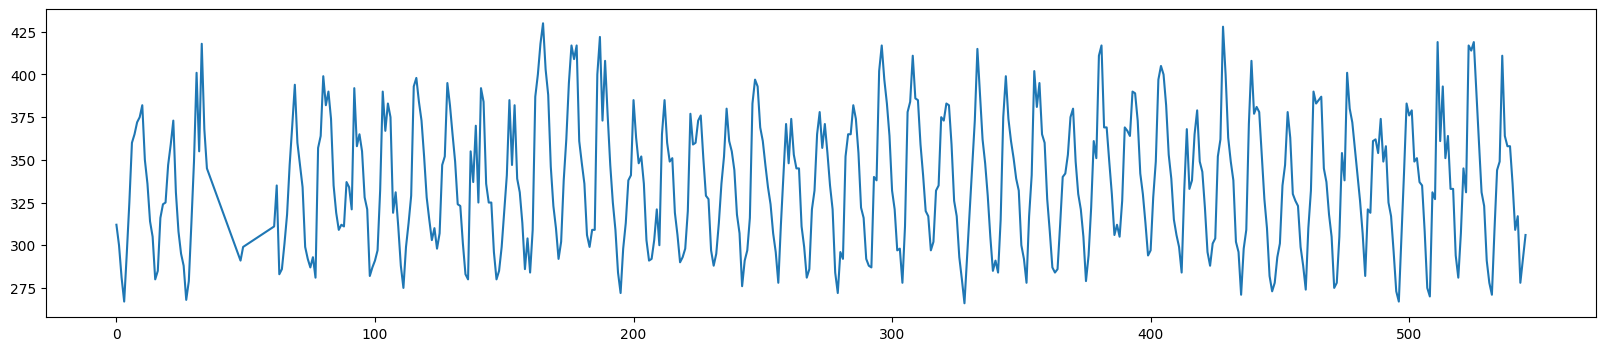

In [11]:
df = df.interpolate()
plt.figure(figsize=(20, 4))
plt.plot(ozone_csv['x'])
plt.show()

In [12]:
alpha = 0.05
name = "Ozone observations"

ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Ozone observations :
Test Statistic                  -4.677484
p-value                          0.000093
#Lags Used                      14.000000
Number of Observations Used    531.000000
Critical Value (1%)             -3.442725
Critical Value (5%)             -2.866998
Critical Value (10%)            -2.569677
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


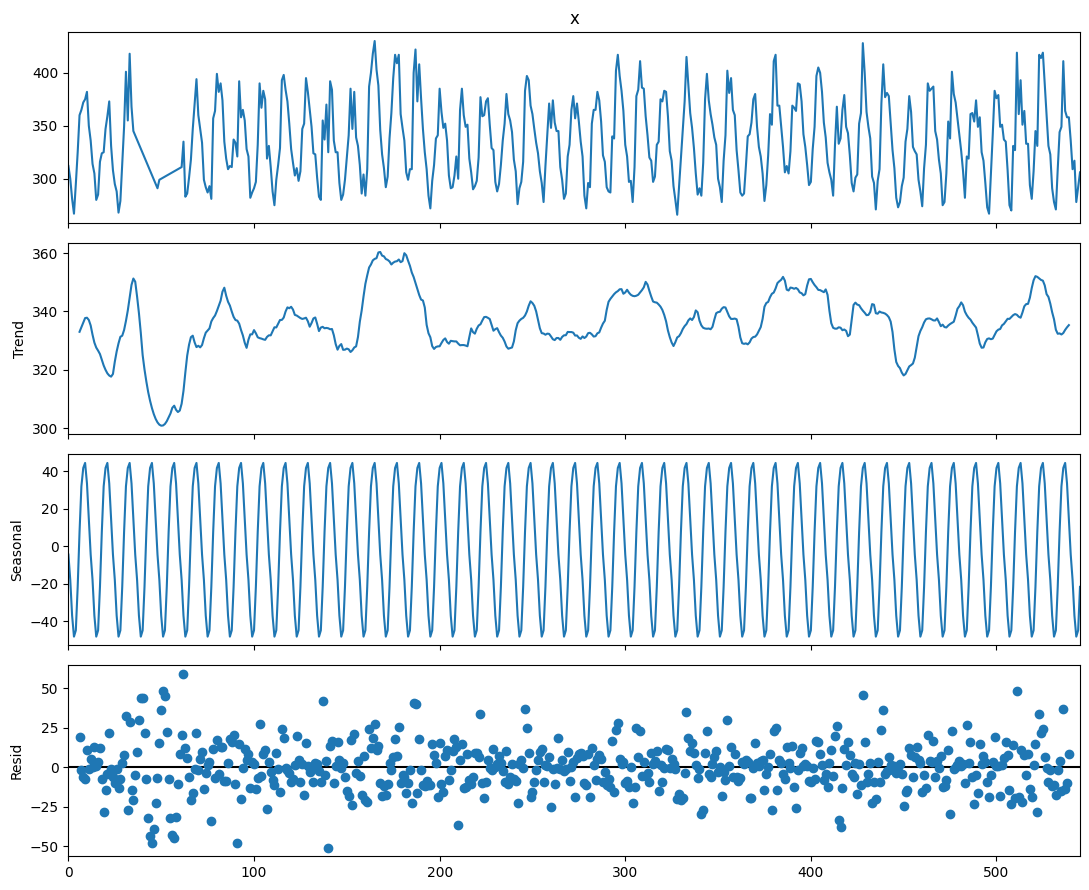

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о перевозках
decompose = seasonal_decompose(ozone_csv["x"], 
                               period=12)
decompose.plot()
plt.show()

In [14]:
nottrend = []
s = 12
notseason = []

# выборка без тренда
for i in range(1, len(df["x"])):
   nottrend.append(df["x"][i + 1] - df["x"][i])

# выборка без сезонности
for i in range(s, len(df["x"])):
   notseason.append(df["x"][i + 1] - df["x"][i - s + 1])

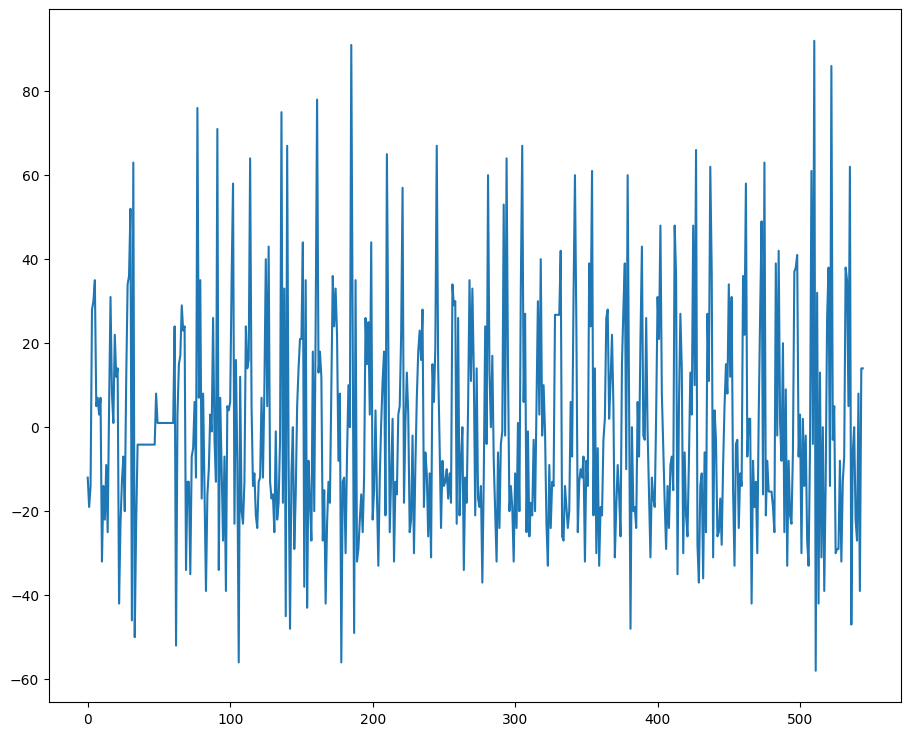

In [15]:
plt.plot(nottrend)

In [16]:
alpha = 0.05
name = "Ozone observations"

ts = nottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Ozone observations :
Test Statistic                 -20.687394
p-value                          0.000000
#Lags Used                       9.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


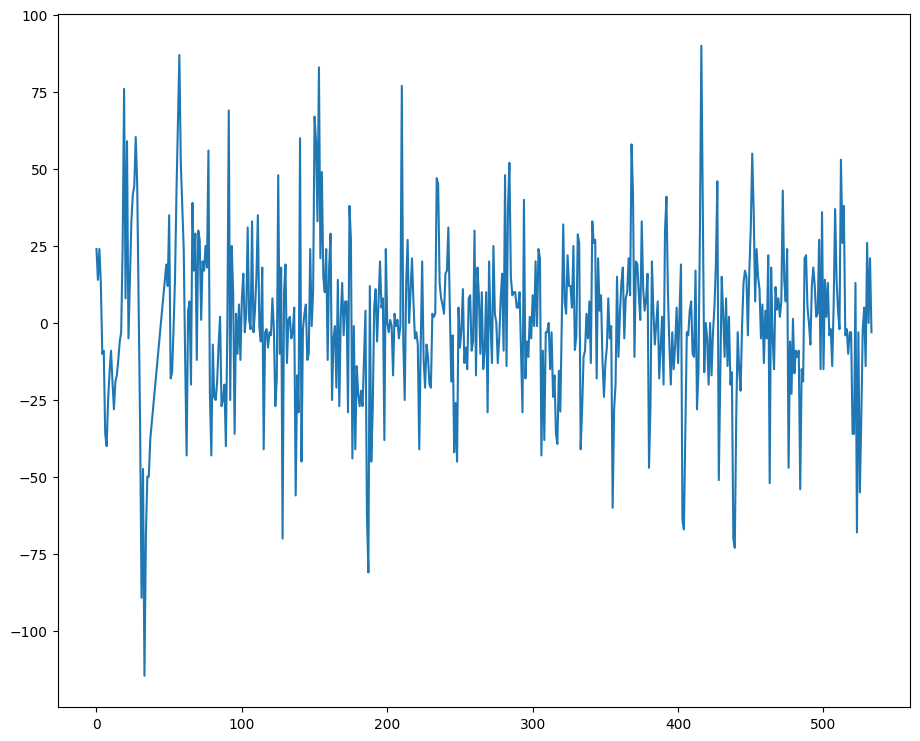

In [17]:
plt.plot(notseason)

In [18]:
alpha = 0.05
name = "Ozone observations"

ts = notseason

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Ozone observations :
Test Statistic                -6.468165e+00
p-value                        1.388434e-08
#Lags Used                     1.400000e+01
Number of Observations Used    5.190000e+02
Critical Value (1%)           -3.443013e+00
Critical Value (5%)           -2.867125e+00
Critical Value (10%)          -2.569745e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


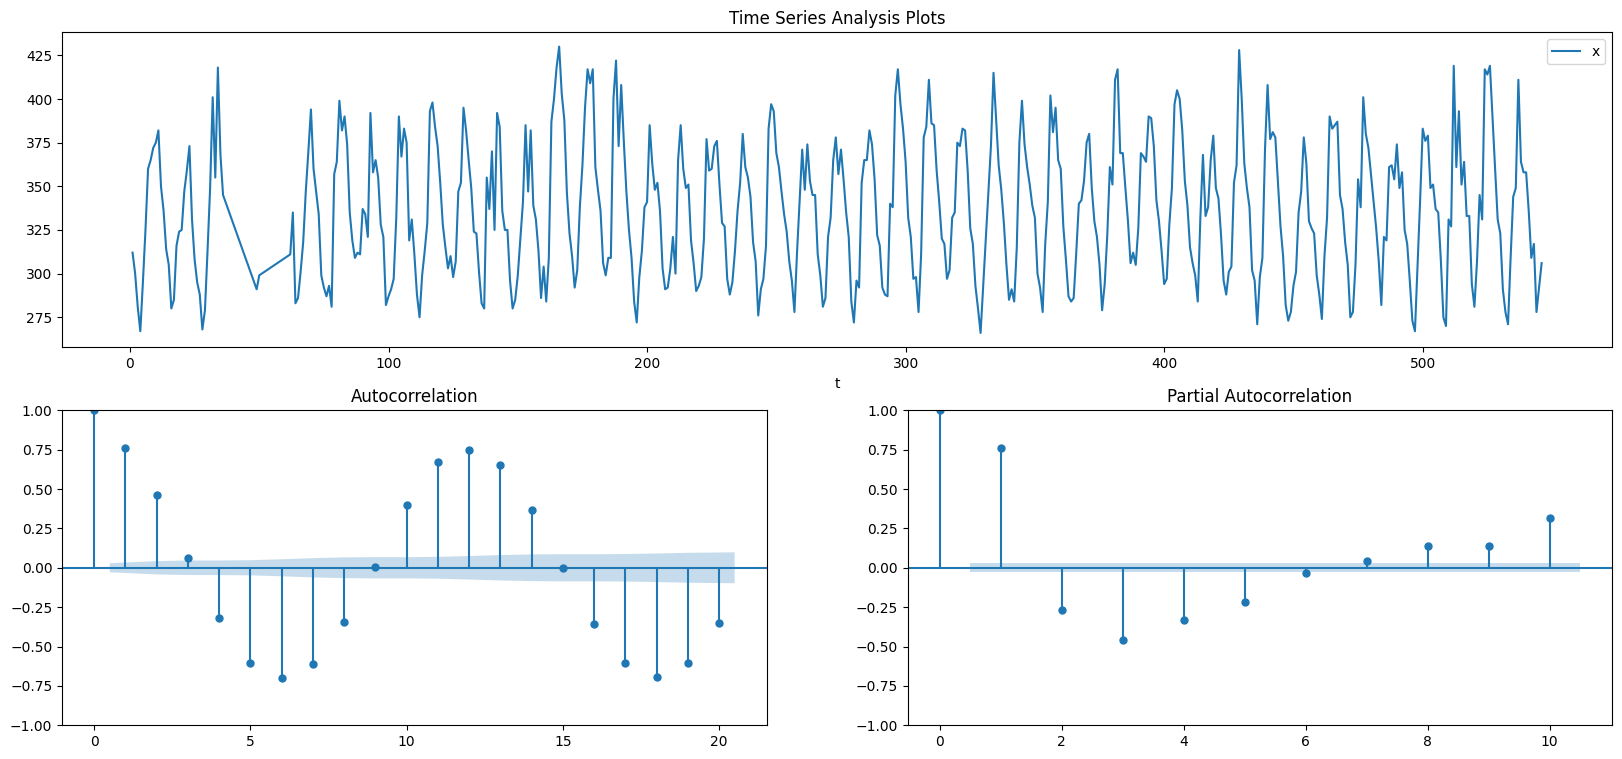

In [19]:
ts = pd.DataFrame(df)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
None

In [20]:
df['t'] = df.index.values

ln = len(df)

print(df)

# указываем 'объемы' выборок
train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

# делим выборки
train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]


         x    t
t              
1    312.0    1
2    300.0    2
3    281.0    3
4    267.0    4
5    295.0    5
..     ...  ...
542  309.0  542
543  317.0  543
544  278.0  544
545  292.0  545
546  306.0  546

[546 rows x 2 columns]


In [21]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [22]:
mod = AutoReg(df.x, 12, old_names=False)
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  546
Model:                    AutoReg(12)   Log Likelihood               -2286.275
Method:               Conditional MLE   S.D. of innovations             17.505
Date:                Fri, 13 Oct 2023   AIC                           4600.550
Time:                        00:20:38   BIC                           4660.476
Sample:                            12   HQIC                          4623.998
                                  546                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9670     24.785      4.033      0.000      51.390     148.544
x.L1           0.4565      0.043     10.552      0.000       0.372       0.541
x.L2           0.2105      0.047      4.522      0.0

c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
mod = AutoReg(df.x, 12, old_names=False)
res = mod.fit(cov_type="HC0")

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  546
Model:                    AutoReg(12)   Log Likelihood               -2286.275
Method:               Conditional MLE   S.D. of innovations             17.505
Date:                Fri, 13 Oct 2023   AIC                           4600.550
Time:                        00:20:38   BIC                           4660.476
Sample:                            12   HQIC                          4623.998
                                  546                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9670     25.708      3.889      0.000      49.580     150.354
x.L1           0.4565      0.053      8.611      0.000       0.353       0.560
x.L2           0.2105      0.051      4.149      0.0

c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  546
Model:                    AutoReg(11)   Log Likelihood               -2290.200
Method:               Conditional MLE   S.D. of innovations             17.493
Date:                Fri, 13 Oct 2023   AIC                           4606.401
Time:                        00:20:38   BIC                           4662.070
Sample:                            11   HQIC                          4628.182
                                  546                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.6968     24.405      4.003      0.000      49.864     145.530
x.L1           0.4516      0.042     10.695      0.000       0.369       0.534
x.L2           0.2056      0.046      4.511      0.0

c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
pred = res.predict(start=1, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff+1, end=(forecast_df.t[len(df.t)]), dynamic=False)

c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


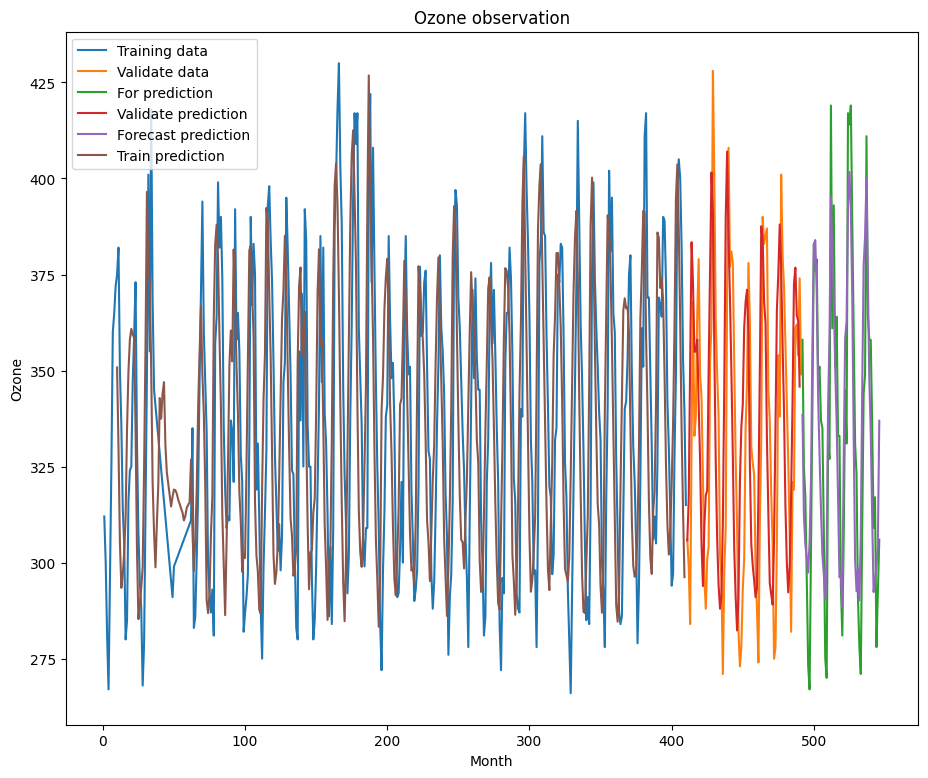

In [26]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Ozone observation')
plt.ylabel('Ozone')
plt.xlabel('Month')
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [29]:
print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))
print("SMAPE: ", np.mean(np.abs(forecast_df.x - f_pred) / forecast_df.x) * 100)

RMSE: 22.17658250872522
MAPE: 0.059995975849299825
MAE: 19.674391032621145
R2:  0.7098627231970094
SMAPE:  5.999597584929982
